# Bike Sharing Assignment

## Importing Libraries

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

from math import sqrt

import warnings
warnings.filterwarnings('ignore')

# Importing CSV Data from file

In [2]:
bd = pd.read_csv('day.csv')

In [3]:
bd.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bd.shape

(730, 16)

In [5]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bd.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Import Visualisation Libraries

In [7]:

import matplotlib.pyplot as plt
import seaborn as sns

# Visualising Numeric Variables In The Dataset

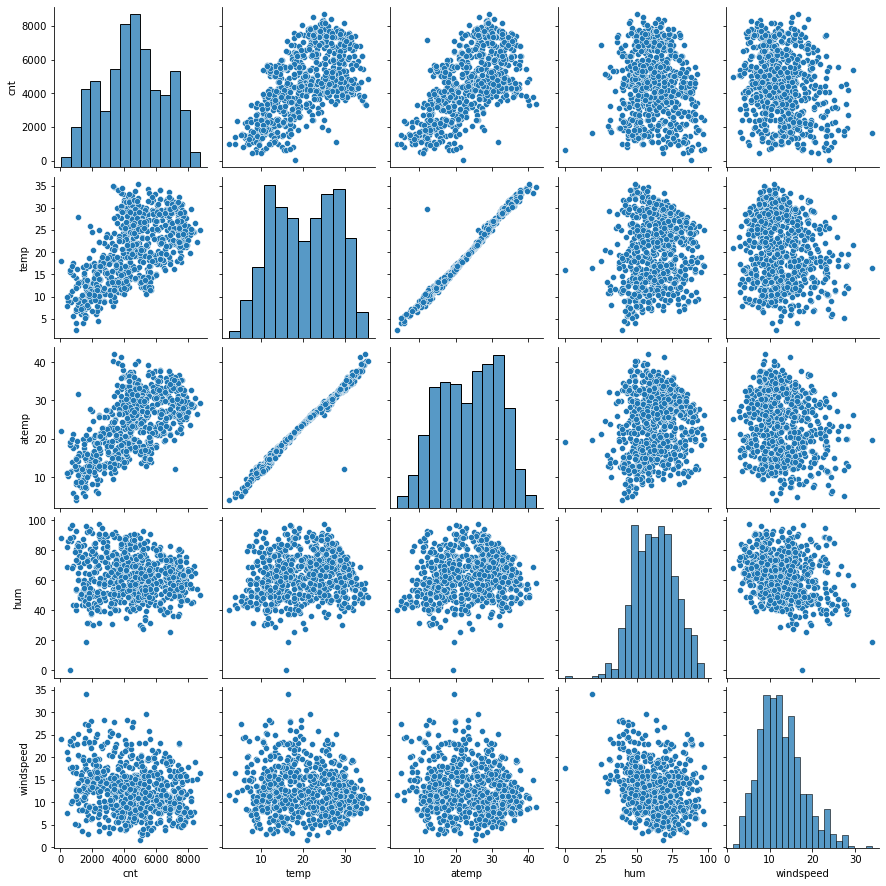

In [8]:

sns.pairplot(data=bd,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

# Visualising Categorical Variable

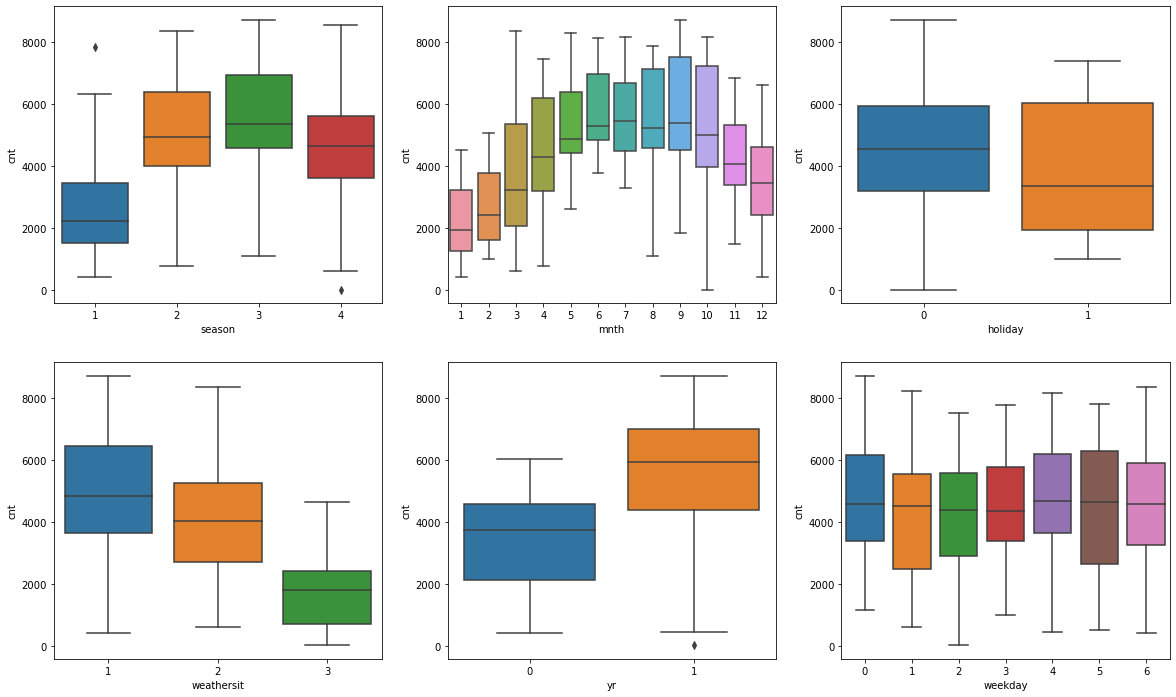

In [9]:

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bd)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bd)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bd)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bd)
plt.subplot(2,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = bd)
plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bd)
plt.show()

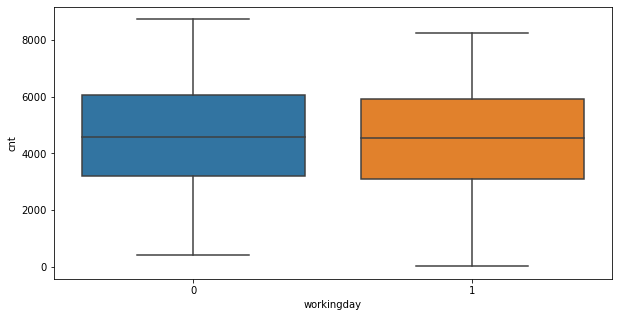

In [10]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'workingday', y = 'cnt', data = bd)
plt.show()

# Dropping Columns That Are Irrelevant For The Model

In [11]:
 
bd.drop(['instant','dteday','casual','registered'],axis = 1,inplace = True)
bd.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


# Converting some numeric values to categorical data

In [12]:

import calendar
bd['mnth'] = bd['mnth'].apply(lambda x: calendar.month_abbr[x])

## Maping Seasons

In [13]:
bd.season = bd.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})

## Mapping Weathersit

In [14]:

bd.weathersit = bd.weathersit.map({1:'Clear',2:'Mist & Cloudy', 
                                             3:'Light Snow & Rain',4:'Heavy Snow & Rain'})

In [15]:
bd.weekday = bd.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})

# Check the dataframe now

In [16]:


bd.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Monday,1,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tuesday,1,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thrusday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### creating dummy variables for season , mnth ,weathersit ,weekday

In [17]:

dummy = bd[['season','mnth','weekday','weathersit']]

In [18]:
dummy = pd.get_dummies(dummy,drop_first=True )

## adding dummy variables to original dataset

In [19]:

bd = pd.concat([dummy,bd],axis = 1)

In [20]:
bd.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Monday,1,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Tuesday,1,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Thrusday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## dropping columns for which dummy variables were created

In [21]:

bd.drop(['season', 'mnth', 'weekday','weathersit'], axis = 1, inplace = True)

In [22]:
bd.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [23]:
bd.shape

(730, 30)

# Step 4 : Training and Testing sets

In [24]:
train, test = train_test_split(bd, train_size = 0.7, test_size = 0.3, random_state = 100)

# Step 5: Feature Scaling

In [25]:
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'dummy' variables.

In [26]:

num_vars = ['cnt','hum','windspeed','temp','atemp']

train[num_vars] = scaler.fit_transform(train[num_vars])

In [27]:
train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973


In [28]:
train.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,...,0.029412,0.343137,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,...,0.169124,0.475223,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Let's check the correlation coefficients to see which variables are highly correlated

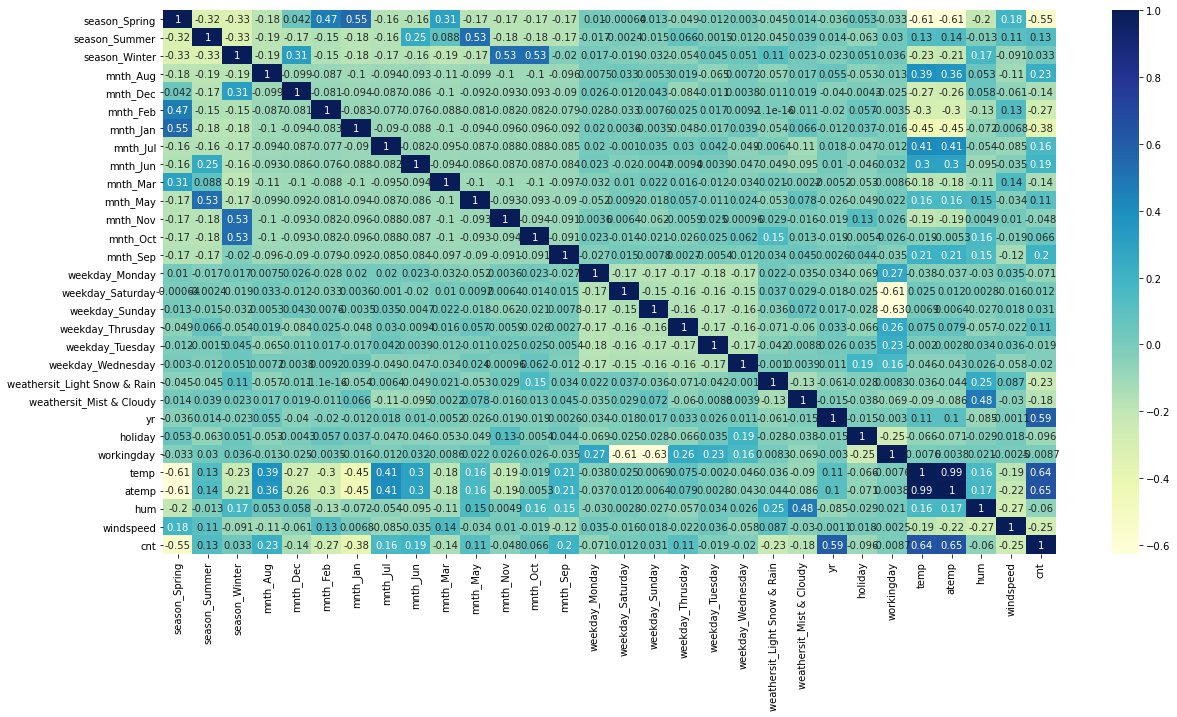

In [29]:


plt.figure(figsize = (20, 10))
sns.heatmap(train.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Dividing into X and y for model building

In [30]:
y_train = train.pop('cnt')
X_train = train

# Step 6 : Building a Linear Model

# Running RFE with the output number of the variable equal to 10

In [31]:

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 13)             # running RFE
rfe = rfe.fit(X_train, y_train)

## Columns selected by RFE and their weights

In [32]:

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 12),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 16),
 ('mnth_Mar', False, 17),
 ('mnth_May', False, 9),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 14),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 11),
 ('weekday_Saturday', False, 6),
 ('weekday_Sunday', False, 7),
 ('weekday_Thrusday', False, 15),
 ('weekday_Tuesday', False, 10),
 ('weekday_Wednesday', False, 13),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 8),
 ('hum', True, 1),
 ('windspeed', True, 1)]

## Starting with all the models selected by RFE

# Model 1

## Print Columns selected by RFE. We will start with these columns for manual elimination

In [33]:

col = X_train.columns[rfe.support_]
col

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sep', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy', 'yr', 'holiday', 'temp', 'hum',
       'windspeed'],
      dtype='object')

In [34]:
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thrusday', 'weekday_Tuesday',
       'weekday_Wednesday', 'workingday', 'atemp'],
      dtype='object')

# Creating X_test dataframe with RFE selected variables

In [35]:

X_train_rfe = X_train[col]

## Adding a constant variable 

In [36]:

 
X_train_rfe = sm.add_constant(X_train_rfe)

## Create a first fitted model

In [37]:

lm = sm.OLS(y_train,X_train_rfe).fit()

## Check the parameters obtained

In [38]:


lm.params

const                           0.295720
season_Spring                  -0.051791
season_Summer                   0.049088
season_Winter                   0.093078
mnth_Jan                       -0.033102
mnth_Jul                       -0.055924
mnth_Sep                        0.082481
weathersit_Light Snow & Rain   -0.240539
weathersit_Mist & Cloudy       -0.054123
yr                              0.230076
holiday                        -0.096813
temp                            0.512685
hum                            -0.166542
windspeed                      -0.187088
dtype: float64

## dropping mnth_Jan since it has p > 0.05

In [39]:


X_train_new = X_train_rfe.drop(["mnth_Jan"], axis = 1)

# Rebuilding the model without 'mnth_Jan'

# Model 2

# Adding a constant variable 

In [40]:

X_train_lm = sm.add_constant(X_train_new)

In [41]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [42]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          1.69e-190
Time:                        13:03:03   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2841      0.034      8.242      0.000       0.216       0.352
season_Spring                   -0.0562      0.021     -2.695      0.007      -0.097      -0.015
season_Summer                    0.0519      0.015      3.457      0.001       0.022       0.081
season_Winter                    0.0987      0.017      5.719      0.000       0.065       0.133
mnth_Jul                        -0.0575      0.018     -3.140      0.002      -0.094      -0.022
mnth_Sep                         0.0830      0.017      4.962      0.000       0.050       0.116
weathersit_Light Snow & Rain    -0.2382      0.026     -9.034      0.000      -0.290      -0.186
weathersit_Mist & Cloudy        -0.0542      0.011     -5.151      0.000      -0.075      -0.034
yr                               0.2293      0.008     28.219      0.000       0.213       0.245
holiday                         -0.0974      0.026     -3.809      0.000      -0.148      -0.047
temp                             0.5300      0.034     15.739      0.000       0.464       0.596
hum                             -0.1710      0.038     -4.526      0.000      -0.245      -0.097
windspeed                       -0.1819      0.026     -7.066      0.000      -0.233      -0.131
==============================================================================
Omnibus:                       57.560   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.574
Skew:                          -0.610   Prob(JB):                     2.69e-29
Kurtosis:                       5.169   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#  Checking VIF for multicollinearity

## Calculate the VIFs for the new model

In [43]:

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,74.38
1,season_Spring,5.02
10,temp,3.61
3,season_Winter,3.49
2,season_Summer,2.61
11,hum,1.90
7,weathersit_Mist & Cloudy,1.56
4,mnth_Jul,1.48
5,mnth_Sep,1.30
6,weathersit_Light Snow & Rain,1.24


## VIF should be less than 5, so we need to drop variables with VIF > 5

In [44]:
X_train_new = X_train_new.drop(['const'], axis=1)

# Calculate the VIFs for the new model again

In [45]:

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,hum,28.06
9,temp,16.02
11,windspeed,4.65
0,season_Spring,4.01
2,season_Winter,3.35
1,season_Summer,2.78
6,weathersit_Mist & Cloudy,2.28
7,yr,2.08
3,mnth_Jul,1.58
4,mnth_Sep,1.38


# Model 3 - Final Model

### dropping hum from the model

In [46]:

X_train_new = X_train_new.drop(['hum'], axis=1)

## Adding a constant variable 

In [47]:

X_train_lm = sm.add_constant(X_train_new)

# Create a first fitted model
lm = sm.OLS(y_train,X_train_lm).fit()

# Check the summary

In [48]:

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          2.40e-187
Time:                        13:03:03   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1996      0.030      6.758      0.000       0.142       0.258
season_Spring                   -0.0669      0.021     -3.167      0.002      -0.108      -0.025
season_Summer                    0.0453      0.015      2.971      0.003       0.015       0.075
season_Winter                    0.0831      0.017      4.818      0.000       0.049       0.117
mnth_Jul                        -0.0524      0.019     -2.811      0.005      -0.089      -0.016
mnth_Sep                         0.0767      0.017      4.511      0.000       0.043       0.110
weathersit_Light Snow & Rain    -0.2852      0.025    -11.536      0.000      -0.334      -0.237
weathersit_Mist & Cloudy        -0.0816      0.009     -9.301      0.000      -0.099      -0.064
yr                               0.2335      0.008     28.361      0.000       0.217       0.250
holiday                         -0.0980      0.026     -3.761      0.000      -0.149      -0.047
temp                             0.4915      0.033     14.798      0.000       0.426       0.557
windspeed                       -0.1480      0.025     -5.893      0.000      -0.197      -0.099
==============================================================================
Omnibus:                       59.298   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.189
Skew:                          -0.628   Prob(JB):                     4.41e-30
Kurtosis:                       5.187   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Calculate the VIFs for the new model again

In [49]:

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,5.09
10,windspeed,4.60
1,season_Summer,2.21
0,season_Spring,2.08
7,yr,2.07
2,season_Winter,1.79
3,mnth_Jul,1.58
6,weathersit_Mist & Cloudy,1.55
4,mnth_Sep,1.34
5,weathersit_Light Snow & Rain,1.08


## Step 7 - Residual Analysis for the Train Data

In [50]:
y_train_cnt = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

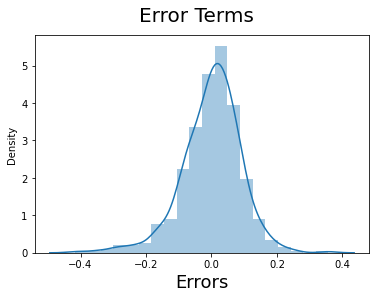

In [51]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

# Step 8 - Predictions using model

In [52]:
num_vars = ['cnt','hum','windspeed','temp','atemp']


test[num_vars] = scaler.transform(test[num_vars])

In [53]:
test.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,...,0.027397,0.319635,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592
std,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,...,0.163612,0.467403,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


In [54]:
y_test = test.pop('cnt')
X_test = test

# Adding constant variable to test dataframe

In [55]:

X_test = sm.add_constant(X_test)

# predicting using values used by the final model

In [56]:

test_col = X_train_lm.columns
X_test=X_test[test_col[1:]]
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   const                         219 non-null    float64
 1   season_Spring                 219 non-null    uint8  
 2   season_Summer                 219 non-null    uint8  
 3   season_Winter                 219 non-null    uint8  
 4   mnth_Jul                      219 non-null    uint8  
 5   mnth_Sep                      219 non-null    uint8  
 6   weathersit_Light Snow & Rain  219 non-null    uint8  
 7   weathersit_Mist & Cloudy      219 non-null    uint8  
 8   yr                            219 non-null    int64  
 9   holiday                       219 non-null    int64  
 10  temp                          219 non-null    float64
 11  windspeed                     219 non-null    float64
dtypes: float64(3), int64(2), uint8(7)
memory usage: 11.8 KB


# Making predictions using the fourth model

In [57]:


y_pred = lm.predict(X_test)

In [58]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8049418440982381

In [59]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

0.009264444750858143

## Step 9 - Model Evaluation

# Plotting y_test and y_pred to understand the spread

Text(0, 0.5, 'y_pred')

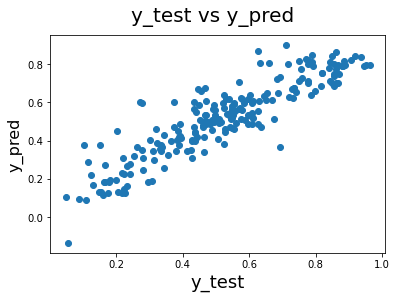

In [60]:


fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [61]:
param = pd.DataFrame(lm.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,12))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
10,temp,0.491508
8,yr,0.233482
0,const,0.199648
3,season_Winter,0.083084
5,mnth_Sep,0.076686
2,season_Summer,0.045280
4,mnth_Jul,-0.052418
1,season_Spring,-0.066942
7,weathersit_Mist & Cloudy,-0.081558


##  equation of our best fitted line is:

cnt = 0.199648 + 0.491508 X temp + 0.233482 X yr + 0.083084 X seasonWinter - 0.066942 X season Spring + 0.083084 X season_Winter -0.052418 X mnth_Jul + 0.076686 X mnth_Sep -0.285155 X weathersit_Light Snow & Rain -0.081558 X weathersit_Mist & Cloudy -0.098013 X holiday -0.147977X windspeed


# Final Result Comparison
* Train r^2 :0.842
* Train Adjusted R^2 :0.838
* Test R^2 :0.80494
* Test Adjusted R^2 :0.00926
* This seems to be a really good model that can very well 'Generalize' various datasets

# FINAL REPORT
* As per our final Model, the top 3 predictor variables that influences the bike booking are:

* Temperature (temp) - A coefficient value of ‘0.5300’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.5300 units.
* Weather Situation 3  - A coefficient value of ‘-0.0542’ indicated that, w.r.t Weathersit1, a unit increase in * Weathersit3 variable decreases the bike hire numbers by 0.0542 units.
* Year (yr) - A coefficient value of ‘0.2293’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2293 units.

# As per our final Model, the top 3 predictor variables that influences the bike booking are:

* Temperature (temp) - A coefficient value of ‘0.5300’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.5300 units.
* Weather Situation 3 (weathersit_3) - A coefficient value of ‘-0.05424’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable decreases the bike hire numbers by 0.0542 units.
* Year (yr) - A coefficient value of ‘0.2293’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2293 units.
* So, it's suggested to consider these variables utmost importance while planning, to achive maximum Booking
* The next best features that can also be considered are

#### NOTE:

* The details of weathersit_1 & weathersit_3
* weathersit_1: Clear, Few clouds, Partly cloudy, Partly cloudy
* weathersit_3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds3